In [75]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
df = pd.read_csv('bert.csv')
df

text  \
0                  effect edentulism spirometric tests   
1    multiple chronic diseases associated tooth los...   
2    knowledge attitudes practices patients healthc...   
3    asthma chronic obstructive pulmonary disease t...   
4    cohort study impact tooth loss periodontal dis...   
..                                                 ...   
121  treatment obstructive sleep apnea using adjust...   
122  management obstructive sleep apnea edentulous ...   
123  treatment obstructive sleep apnoea edentulous ...   
124                   managing obstructive sleep apnea   
125  mandibular advancement combined horizontal adv...   

                                                 text2  label  
0    impact denture wear edentulous subjects perfor...      1  
1    half us adults aged years lost least one perma...      0  
2    poor oral health associated worse clinical out...      0  
3    adults chronic respiratory conditions specific...      0  
4    copd patients fatal nonfatal respiratoryrelate...      0  
..                                                 ...    ...  
121  paper reports case oral appliance used treatme...      0  
122  literature treatment obstructive sleep apnea e...      1  
123  report describes fabrication prosthesis preven...      1  
124  obstructive sleep apnea cessation breathing sl...      1  
125  orthognathic surgical procedures used past tre...      1  

[126 rows x 3 columns]

In [77]:
from imblearn.over_sampling import RandomOverSampler

def perform_oversampling(df):
    ros = RandomOverSampler(random_state=0)
    X = df[['text', 'text2']]
    y = df['label']
    X_resampled, y_resampled = ros.fit_resample(X, y)
    df_resampled = pd.DataFrame(X_resampled, columns=['text', 'text2'])
    df_resampled['label'] = y_resampled
    return df_resampled

print('Original data:')
print(df['label'].value_counts())

df = perform_oversampling(df)

print('-' * 10)
print('After oversampling:')
print(df['label'].value_counts())


Original data:
label
0    113
1     13
Name: count, dtype: int64
----------
After oversampling:
label
1    113
0    113
Name: count, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np

train_data, test_data = train_test_split(df, stratify=df['label'], test_size=0.2, random_state=25)

train_data['features'] = train_data['text'].astype(str) + train_data['text2'].astype(str)
test_data['features'] = test_data['text'].astype(str) + test_data['text2'].astype(str)

X = train_data['features']
Y = train_data['label']

x_test = test_data['features']
y_test = test_data['label']


tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X) 
tfidf_test=tfidf_vectorizer.transform(x_test)



In [79]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [80]:
print('train shape:', tfidf_train.shape)
print('test shape:', tfidf_test.shape)

train shape: (180, 2902)
test shape: (46, 2902)


In [81]:
import xgboost as xgb

model = xgb.XGBClassifier(
    eval_metric='auc',
    subsample = 1,
    n_estimators=300,
    max_depth=500,
    colsample_bytree=0.5,
    learning_rate=0.1
)

In [82]:
import xgboost as xgb

model = xgb.XGBClassifier(
    eval_metric='auc',
    subsample=1,
    n_estimators=300,
    max_depth=500,
    colsample_bytree=0.5,
    learning_rate=0.1
)

eval_set = [(tfidf_train, Y), (tfidf_test, y_test)]

model.fit(
    tfidf_train,
    Y,
    early_stopping_rounds=10,
    eval_set=eval_set,
    verbose=True
)

[0]	validation_0-auc:0.99660	validation_1-auc:0.90737
[1]	validation_0-auc:1.00000	validation_1-auc:1.00000
[2]	validation_0-auc:1.00000	validation_1-auc:1.00000
[3]	validation_0-auc:1.00000	validation_1-auc:0.99055
[4]	validation_0-auc:1.00000	validation_1-auc:0.98488
[5]	validation_0-auc:1.00000	validation_1-auc:0.98488
[6]	validation_0-auc:1.00000	validation_1-auc:1.00000
[7]	validation_0-auc:1.00000	validation_1-auc:1.00000
[8]	validation_0-auc:1.00000	validation_1-auc:0.98488
[9]	validation_0-auc:1.00000	validation_1-auc:0.98488
[10]	validation_0-auc:1.00000	validation_1-auc:0.98488


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=500, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
tfidf_train = train_data['features'].values
y_train = train_data['label'].values

In [84]:
y_true = np.array(y_test.tolist())
y_pred = model.predict_proba(tfidf_test)[:,1]
y_pred = np.where(y_pred > 0.5, 1, 0)   
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0])

Text(50.722222222222214, 0.5, 'Truth')

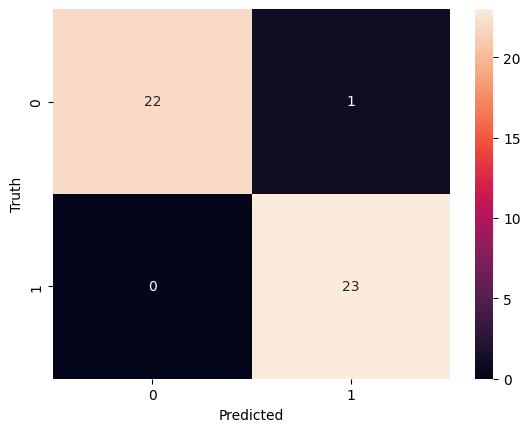

In [85]:
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        23

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



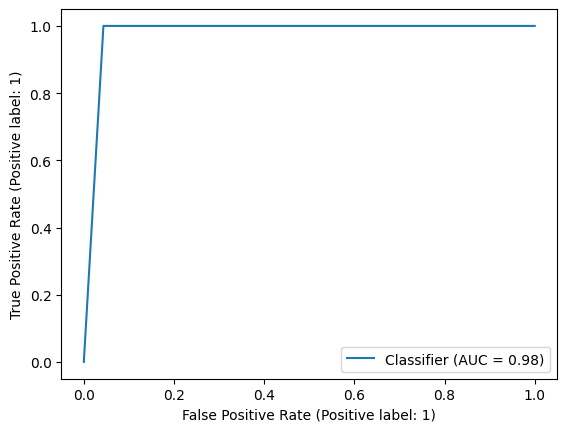

In [87]:

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_true, y_pred)